In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Temperaturas.zip",index_col=0)
df.head()

/Users/jsortega/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,sensor,fecha,temperatura
id,,,
2,sala,2020-03-31 14:38:14,23.80
3,oficina,2020-03-31 14:43:40,27.20
4,piscina,2020-03-31 14:46:26,27.62
5,sala,2020-03-31 14:48:14,25.40
6,oficina,2020-03-31 14:53:40,28.80


In [8]:
ndf=df[df["sensor"]=='piscina']
ndf.head()

,sensor,fecha,temperatura
id,,,
4,piscina,2020-03-31 14:46:26,27.62
7,piscina,2020-03-31 14:56:32,27.56
10,piscina,2020-03-31 15:06:37,27.62
13,piscina,2020-03-31 15:16:42,27.62
16,piscina,2020-03-31 15:26:47,27.62


In [9]:
ndf.dtypes

sensor          object
fecha           object
temperatura    float64
dtype: object

In [10]:

ndf.drop(['sensor'], axis=1, inplace=True)
ndf

/Users/jsortega/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,temperatura
id,,
4,2020-03-31 14:46:26,27.62
7,2020-03-31 14:56:32,27.56
10,2020-03-31 15:06:37,27.62
13,2020-03-31 15:16:42,27.62
16,2020-03-31 15:26:47,27.62
...,...,...
1656995,2022-09-29 15:10:46,29.06
1656997,2022-09-29 15:11:46,29.06
1656998,2022-09-29 15:12:46,29.12


In [11]:
datetime_index = pd.DatetimeIndex(ndf.fecha.values)

df2=ndf.set_index(datetime_index)

In [12]:
df2.drop('fecha', axis=1, inplace=True)


In [13]:
df2.head()

,temperatura
2020-03-31 14:46:26,27.62
2020-03-31 14:56:32,27.56
2020-03-31 15:06:37,27.62
2020-03-31 15:16:42,27.62
2020-03-31 15:26:47,27.62


In [31]:
#df2.set_index('fecha', inplace=True)
# Taking mean values for a frequency of 2 minutes
df_group = df2.groupby(pd.Grouper( freq='10T'))['temperatura'].agg('mean')   
df_group.dropna(inplace=True)
df_group = df_group.to_frame().reset_index()
#print(df_group)
#ndf.info()



In [32]:
df_group.head()

,index,temperatura
0,2020-03-31 14:40:00,27.62
1,2020-03-31 14:50:00,27.56
2,2020-03-31 15:00:00,27.62
3,2020-03-31 15:10:00,27.62
4,2020-03-31 15:20:00,27.62


In [50]:
df_group_min=df_group[df_group.temperatura>22]
df_group=df_group_min[df_group_min.temperatura<32]
df_group


,index,temperatura
0,2020-03-31 14:40:00,27.620
1,2020-03-31 14:50:00,27.560
2,2020-03-31 15:00:00,27.620
3,2020-03-31 15:10:00,27.620
4,2020-03-31 15:20:00,27.620
...,...,...
124489,2022-09-29 14:30:00,28.958
124490,2022-09-29 14:40:00,29.000
124491,2022-09-29 14:50:00,29.030
124492,2022-09-29 15:00:00,29.060


In [74]:
df_group.drop(df_group.index[750:820], inplace=True)

In [75]:
df_group.shape

(116391, 2)

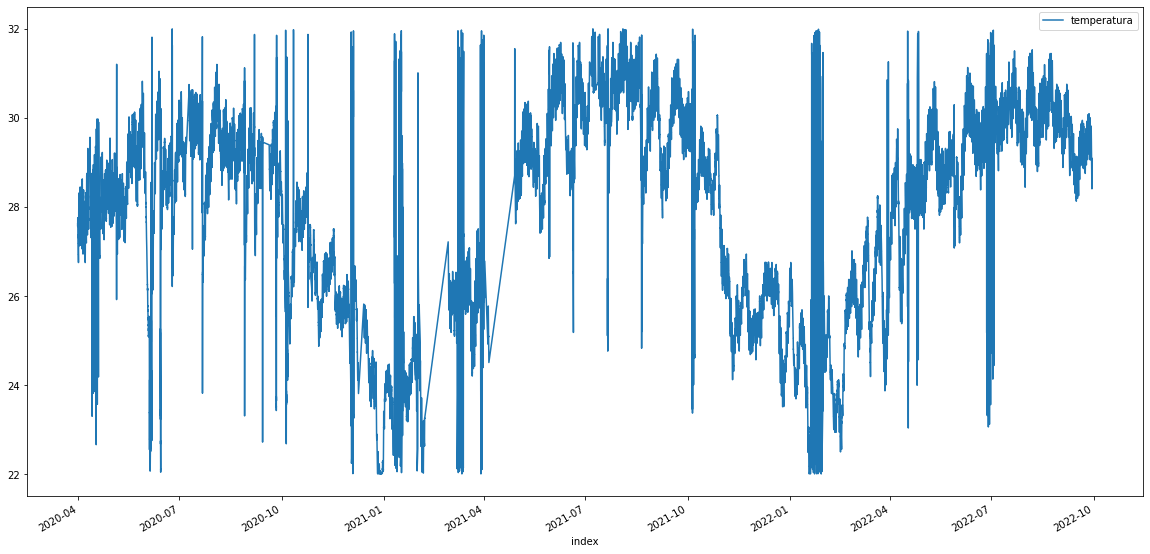

In [77]:
df_group.plot( x='index', y='temperatura', figsize=(20,10))
plt.show()

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='temperatura'>

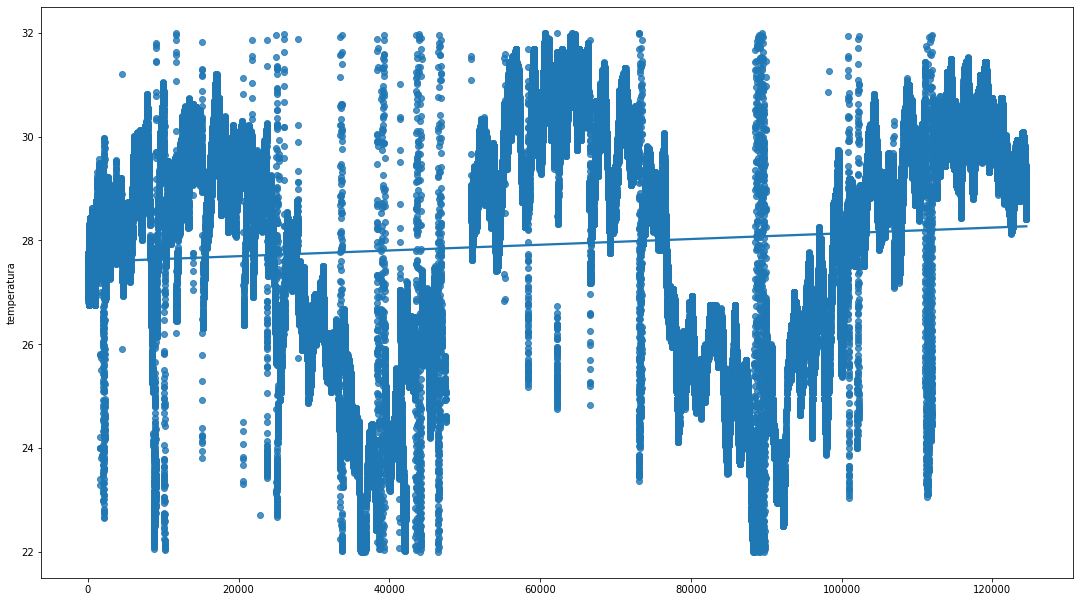

In [78]:

p = sns.regplot(data = df_group,  
                x = df_group.index, 
                y = df_group.temperatura
               ) 
p.figure.set_size_inches(18.5, 10.5)
p